In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [2]:
def prepare_image(file):
    img_path = "C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/"
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    processed = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(processed)

In [3]:
def explained_predictions(preds):
    x=preds[0]
    print("The following table explains what are the chances of the image belonging to a particular class:")
    print()
    print("  TYPE        PROBABILITY")
    print("AEROPLANE      ",round(x[0]*100, 4),"%")
    print("CAR            ",round(x[1]*100, 4),"%")
    print("HELICOPTER     ",round(x[2]*100, 4),"%")
    print("SHIP           ",round(x[3]*100, 4),"%")
    print("TRAIN          ",round(x[4]*100, 4),"%")
    print("TWO WHEELER    ",round(x[5]*100, 4),"%")

In [4]:
base_model=MobileNet(weights='imagenet',include_top=False)

In [5]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(6,activation='softmax')(x)

In [6]:
##define trainable layers
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [7]:
##load the training dataset
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
## images in subfolders = no of classes, load parent folder
train_generator=train_datagen.flow_from_directory("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT",
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 120 images belonging to 6 classes.


In [8]:
##prepare and train the model- will go thru 5 epochs, each of 5
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer, evaluation metric will be accuracy
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
3/3 [==============================] - 7s 2s/step - loss: 2.1923 - accuracy: 0.3125
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 0.4345 - accuracy: 0.8636
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 0.0902 - accuracy: 0.9773
Epoch 4/5
3/3 [==============================] - 7s 2s/step - loss: 0.0245 - accuracy: 0.9896
Epoch 5/5
3/3 [==============================] - 7s 2s/step - loss: 7.2337e-04 - accuracy: 1.0000


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

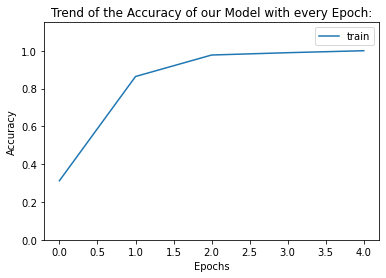

In [10]:
plt.plot(history.history['accuracy'])
plt.ylim(0,1.15)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Trend of the Accuracy of our Model with every Epoch:")
plt.legend(['train'])
plt.show()

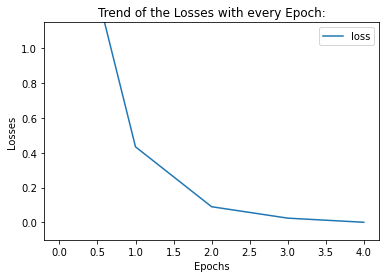

In [11]:
plt.plot(history.history['loss'])
plt.ylim(-0.1,1.15)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Trend of the Losses with every Epoch:")
plt.legend(['loss'])
plt.show()

In [12]:
# serialize model to JSON and save to disk
model_json = model.to_json()
with open("Trained_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and save to disk
model.save_weights("Trained_Weights.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# load model and weights
json_file = open('Trained_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights 
loaded_model.load_weights("Trained_Weights.h5")
print("Loaded model from disk")

Loaded model from disk


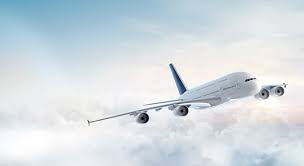

In [14]:
keras.preprocessing.image.load_img("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/test_1.jpg", 
                                   grayscale=False, color_mode="rgb", 
                                   target_size=None, interpolation="nearest")

In [15]:
preprocessed_image = prepare_image("test_1.jpg")
predictions = model.predict(preprocessed_image)
explained_predictions(predictions)

The following table explains what are the chances of the image belonging to a particular class:

  TYPE        PROBABILITY
AEROPLANE       99.9998 %
CAR             0.0 %
HELICOPTER      0.0002 %
SHIP            0.0 %
TRAIN           0.0 %
TWO WHEELER     0.0 %


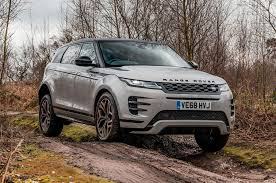

In [16]:
##load image for prediction
keras.preprocessing.image.load_img("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/test_2.jpg", 
                                    grayscale=False, color_mode="rgb", 
                                    target_size=None, interpolation="nearest")

In [17]:
preprocessed_image = prepare_image("test_2.jpg")
predictions = model.predict(preprocessed_image)
explained_predictions(predictions)

The following table explains what are the chances of the image belonging to a particular class:

  TYPE        PROBABILITY
AEROPLANE       0.0 %
CAR             100.0 %
HELICOPTER      0.0 %
SHIP            0.0 %
TRAIN           0.0 %
TWO WHEELER     0.0 %


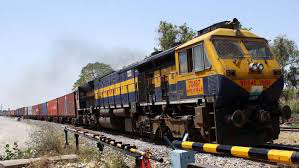

In [18]:
##load image for prediction
keras.preprocessing.image.load_img("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/test_3.jpg",
                                   grayscale=False, color_mode="rgb", 
                                   target_size=None, interpolation="nearest")

In [19]:
preprocessed_image = prepare_image("test_3.jpg")
predictions = model.predict(preprocessed_image)
explained_predictions(predictions)

The following table explains what are the chances of the image belonging to a particular class:

  TYPE        PROBABILITY
AEROPLANE       0.4258 %
CAR             0.0 %
HELICOPTER      2.014 %
SHIP            97.5006 %
TRAIN           0.0596 %
TWO WHEELER     0.0 %


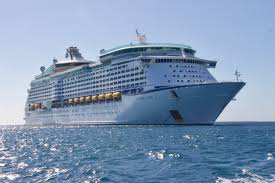

In [20]:
##load image for prediction
keras.preprocessing.image.load_img("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/test_4.jpg", 
                                   grayscale=False, color_mode="rgb", 
                                   target_size=None, interpolation="nearest")

In [21]:
preprocessed_image = prepare_image("test_4.jpg")
predictions = model.predict(preprocessed_image)
explained_predictions(predictions)

The following table explains what are the chances of the image belonging to a particular class:

  TYPE        PROBABILITY
AEROPLANE       0.0 %
CAR             0.0 %
HELICOPTER      0.0 %
SHIP            100.0 %
TRAIN           0.0 %
TWO WHEELER     0.0 %


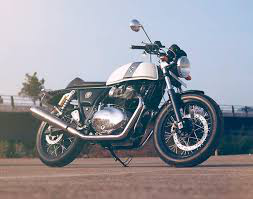

In [22]:
##load image for prediction
keras.preprocessing.image.load_img("C:/Users/aazha/OneDrive/Pictures/MEANS OF TRANSPORT/test_5.jpg", 
                                   grayscale=False, color_mode="rgb", 
                                   target_size=None, interpolation="nearest")

In [23]:
preprocessed_image = prepare_image("test_5.jpg")
predictions = model.predict(preprocessed_image)
explained_predictions(predictions)

The following table explains what are the chances of the image belonging to a particular class:

  TYPE        PROBABILITY
AEROPLANE       0.0 %
CAR             0.0 %
HELICOPTER      0.0 %
SHIP            0.0 %
TRAIN           0.0 %
TWO WHEELER     100.0 %
